<a href="https://colab.research.google.com/github/pavel7479/For_resume/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2_%D1%85%D0%BE%D0%BA%D0%BA%D0%B5%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BC%D0%B0%D1%82%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка БД

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import display

In [ ]:
# загружаем данные
excel_data = pd.read_excel('/content/drive/MyDrive/Диплом Мой AI/Data/Новый сайт, данные/hockey_280.xlsx', sheet_name = 0)
excel_data.head()


,A,B,Data,bet_win,bet_draw,bet_loss,game score A,game score B,period 1 score A,period 1 score B,...,B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве
0,Спартак Москва,ХК Сочи,07.12.23,1.456,5.24,5.930,4,3,0,1,...,8,12,92.31,2,4,2,7,43.75,1,0
1,Северсталь,Динамо Москва,07.12.23,3.020,3.96,2.160,1,1,0,0,...,1,12,100.00,1,2,6,15,65.22,1,0
2,Локомотив,Ак Барс,07.12.23,2.152,3.72,3.184,3,1,0,1,...,4,14,100.00,1,2,8,9,34.62,0,0
3,Витязь,ЦСКА,07.12.23,4.360,4.26,1.715,1,4,0,2,...,2,6,85.71,0,0,7,9,60.00,0,0
4,Лада,Нефтехимик,07.12.23,2.325,3.71,2.870,3,0,0,0,...,3,4,80.00,1,2,1,7,58.33,0,0


In [ ]:
# маркируем домашнюю команду 0, гостевую 1
excel_data['A'] = 0.0
excel_data['B'] = 1.0

# вставляем столбец с целевыми значениями 0 - проиграл, 1 - ничья, 2 - выиграл
# Определяем условия для сравнения
conditions = [(excel_data['game score A'] < excel_data['game score B']), (excel_data['game score A'] == excel_data['game score B']),
 (excel_data['game score A'] > excel_data['game score B'])]

# Определяем значения, которые будут присвоены в зависимости от условий
values = [0.0, 1.0, 2.0]

# Создаем новый столбец 'Win'
excel_data['Win'] = np.select(conditions, values, default=-1.0) # В результате новый столбец 'Win' будет заполнен значениями в зависимости от сравнения


In [ ]:
# Вывод всё таблицы
pd.set_option('display.max_columns', None)
display(excel_data)


,A,B,Data,bet_win,bet_draw,bet_loss,game score A,game score B,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве,Win
0,0.0,1.0,07.12.23,1.456,5.24,5.930,4,3,0,1,1,1,5,0.00,4,9,90.00,2,4,1,9,56.25,0,0,10,10.00,8,5,100.00,2,4,1,7,43.75,0,0,13,7.69,2,1,50.00,1,2,5,9,56.25,0,0,2,50.00,8,12,92.31,2,4,2,7,43.75,1,0,2.0
1,0.0,1.0,07.12.23,3.020,3.96,2.160,1,1,0,0,0,1,3,0.00,8,12,100.00,1,2,2,8,42.11,0,0,12,0.00,5,3,100.00,0,0,5,11,57.89,0,0,12,0.00,6,9,90.00,1,2,2,8,34.78,0,0,10,10.00,1,12,100.00,1,2,6,15,65.22,1,0,1.0
2,0.0,1.0,07.12.23,2.152,3.72,3.184,3,1,0,1,0,0,7,0.00,8,12,92.31,2,4,10,10,58.82,0,0,13,7.69,6,7,100.00,0,0,9,7,41.18,0,0,14,0.00,0,5,100.00,1,2,6,17,65.38,0,0,5,0.00,4,14,100.00,1,2,8,9,34.62,0,0,2.0
3,0.0,1.0,07.12.23,4.360,4.26,1.715,1,4,0,2,1,0,3,0.00,7,11,84.62,1,5,5,10,50.00,0,0,13,15.38,8,3,100.00,2,7,11,10,50.00,0,0,7,14.29,10,10,100.00,1,2,9,6,40.00,0,0,10,0.00,2,6,85.71,0,0,7,9,60.00,0,0,0.0
4,0.0,1.0,07.12.23,2.325,3.71,2.870,3,0,0,0,1,0,5,0.00,2,14,100.00,2,4,5,9,64.29,0,0,14,0.00,2,5,100.00,1,2,4,5,35.71,0,0,5,20.00,5,5,100.00,1,2,1,5,41.67,1,0,5,0.00,3,4,80.00,1,2,1,7,58.33,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,1.0,09.10.23,5.090,4.70,1.568,2,2,1,1,1,1,8,12.50,9,16,94.12,2,4,2,11,45.83,0,0,17,5.88,2,7,87.50,1,2,9,13,54.17,1,0,10,10.00,8,4,80.00,4,8,9,9,56.25,0,0,5,20.00,3,9,90.00,3,6,5,7,43.75,0,0,1.0
276,0.0,1.0,09.10.23,1.320,6.15,7.930,6,2,2,0,3,1,19,10.53,3,11,100.00,0,0,2,14,56.00,1,0,11,0.00,3,17,89.47,2,4,1,11,44.00,0,0,14,21.43,2,3,75.00,3,6,2,11,57.89,0,0,4,25.00,7,11,78.57,2,4,2,8,42.11,0,0,2.0
277,0.0,1.0,09.10.23,3.025,3.97,2.152,0,0,0,0,0,0,5,0.00,4,10,100.00,0,0,1,4,23.53,0,0,10,0.00,2,5,100.00,0,0,11,13,76.47,0,0,6,0.00,5,18,100.00,0,0,0,12,48.00,0,0,18,0.00,2,6,100.00,0,0,7,13,52.00,0,0,1.0
278,0.0,1.0,09.10.23,2.288,3.60,3.016,1,0,0,0,0,0,8,0.00,6,10,100.00,2,4,5,9,81.82,0,0,10,0.00,6,8,100.00,0,0,8,2,18.18,0,0,13,0.00,5,5,100.00,1,2,7,12,66.67,0,0,5,0.00,5,13,100.00,2,4,5,6,33.33,0,0,2.0


In [ ]:
# Удаление столбцов game score A и game score B, т.к. они результат матча и Data
columns_to_drop = ['game score A', 'game score B', 'Data']
excel_data.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Вывод всё таблицы
pd.set_option('display.max_columns', None)
display(excel_data)

,A,B,bet_win,bet_draw,bet_loss,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве,Win
0,0.0,1.0,1.456,5.24,5.930,0,1,1,1,5,0.00,4,9,90.00,2,4,1,9,56.25,0,0,10,10.00,8,5,100.00,2,4,1,7,43.75,0,0,13,7.69,2,1,50.00,1,2,5,9,56.25,0,0,2,50.00,8,12,92.31,2,4,2,7,43.75,1,0,2.0
1,0.0,1.0,3.020,3.96,2.160,0,0,0,1,3,0.00,8,12,100.00,1,2,2,8,42.11,0,0,12,0.00,5,3,100.00,0,0,5,11,57.89,0,0,12,0.00,6,9,90.00,1,2,2,8,34.78,0,0,10,10.00,1,12,100.00,1,2,6,15,65.22,1,0,1.0
2,0.0,1.0,2.152,3.72,3.184,0,1,0,0,7,0.00,8,12,92.31,2,4,10,10,58.82,0,0,13,7.69,6,7,100.00,0,0,9,7,41.18,0,0,14,0.00,0,5,100.00,1,2,6,17,65.38,0,0,5,0.00,4,14,100.00,1,2,8,9,34.62,0,0,2.0
3,0.0,1.0,4.360,4.26,1.715,0,2,1,0,3,0.00,7,11,84.62,1,5,5,10,50.00,0,0,13,15.38,8,3,100.00,2,7,11,10,50.00,0,0,7,14.29,10,10,100.00,1,2,9,6,40.00,0,0,10,0.00,2,6,85.71,0,0,7,9,60.00,0,0,0.0
4,0.0,1.0,2.325,3.71,2.870,0,0,1,0,5,0.00,2,14,100.00,2,4,5,9,64.29,0,0,14,0.00,2,5,100.00,1,2,4,5,35.71,0,0,5,20.00,5,5,100.00,1,2,1,5,41.67,1,0,5,0.00,3,4,80.00,1,2,1,7,58.33,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,1.0,5.090,4.70,1.568,1,1,1,1,8,12.50,9,16,94.12,2,4,2,11,45.83,0,0,17,5.88,2,7,87.50,1,2,9,13,54.17,1,0,10,10.00,8,4,80.00,4,8,9,9,56.25,0,0,5,20.00,3,9,90.00,3,6,5,7,43.75,0,0,1.0
276,0.0,1.0,1.320,6.15,7.930,2,0,3,1,19,10.53,3,11,100.00,0,0,2,14,56.00,1,0,11,0.00,3,17,89.47,2,4,1,11,44.00,0,0,14,21.43,2,3,75.00,3,6,2,11,57.89,0,0,4,25.00,7,11,78.57,2,4,2,8,42.11,0,0,2.0
277,0.0,1.0,3.025,3.97,2.152,0,0,0,0,5,0.00,4,10,100.00,0,0,1,4,23.53,0,0,10,0.00,2,5,100.00,0,0,11,13,76.47,0,0,6,0.00,5,18,100.00,0,0,0,12,48.00,0,0,18,0.00,2,6,100.00,0,0,7,13,52.00,0,0,1.0
278,0.0,1.0,2.288,3.60,3.016,0,0,0,0,8,0.00,6,10,100.00,2,4,5,9,81.82,0,0,10,0.00,6,8,100.00,0,0,8,2,18.18,0,0,13,0.00,5,5,100.00,1,2,7,12,66.67,0,0,5,0.00,5,13,100.00,2,4,5,6,33.33,0,0,2.0


In [ ]:
excel_data.dtypes

A                                 float64
B                                 float64
bet_win                           float64
bet_draw                          float64
bet_loss                          float64
period 1 score A                    int64
period 1 score B                    int64
period 2 score A                    int64
period 2 score B                    int64
А_п.1 Броски в створ                int64
А_п.1 Реализованные броски (%)    float64
А_п.1 Блокировано бросков           int64
А_п.1 Отраженные броски             int64
А_п.1 Отраженные броски (%)       float64
А_п.1 Удаления                      int64
А_п.1 Штрафное время                int64
А_п.1 Силовые приемы                int64
А_п.1 Выигранные вбрасывания        int64
А_п.1 Вбрасывания (%)             float64
А_п.1 Шайбы в большинстве           int64
А_п.1 Шайбы в меньшинстве           int64
B_п.1 Броски в створ                int64
B_п.1 Реализованные броски (%)    float64
B_п.1 Блокировано бросков         

In [ ]:
# Нормализация данных
df_normalized = pd.DataFrame(excel_data)
# Исключаем столбец 'Win' из нормализации
columns_to_normalize = df_normalized.columns.difference(['Win', 'A', 'B'])

# Создаем экземпляр MinMaxScaler
scaler = MinMaxScaler()

# Нормализуем выбранные столбцы
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])


In [ ]:
# Вывод всё таблицы
pd.set_option('display.max_columns', None)
display(df_normalized)

,A,B,bet_win,bet_draw,bet_loss,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве,Win
0,0.0,1.0,0.025139,0.662338,0.655421,0.00,0.333333,0.25,0.333333,0.12,0.000000,0.307692,0.250000,0.8000,0.4,0.129032,0.047619,0.259259,0.474979,0.0,0.0,0.258065,0.2000,0.40,0.173913,1.000000,0.333333,0.333333,0.071429,0.233333,0.525021,0.0,0.0,0.55,0.1538,0.153846,0.000000,0.250037,0.2,0.064516,0.333333,0.421053,0.615385,0.0,0.0,0.00,0.749963,0.533333,0.55,0.8462,0.333333,0.074074,0.153846,0.238095,0.384615,0.5,0.0,2.0
1,0.0,1.0,0.314233,0.187384,0.111880,0.00,0.000000,0.00,0.333333,0.04,0.000000,0.615385,0.357143,1.0000,0.2,0.064516,0.095238,0.222222,0.305292,0.0,0.0,0.322581,0.0000,0.25,0.086957,1.000000,0.000000,0.000000,0.357143,0.366667,0.694708,0.0,0.0,0.50,0.0000,0.461538,0.380952,0.850007,0.2,0.064516,0.133333,0.368421,0.351138,0.0,0.0,0.40,0.149993,0.066667,0.55,1.0000,0.166667,0.037037,0.461538,0.619048,0.648862,0.5,0.0,1.0
2,0.0,1.0,0.153789,0.098330,0.259516,0.00,0.333333,0.00,0.000000,0.20,0.000000,0.615385,0.357143,0.8462,0.4,0.129032,0.476190,0.296296,0.505820,0.0,0.0,0.354839,0.1538,0.30,0.260870,1.000000,0.000000,0.000000,0.642857,0.233333,0.494180,0.0,0.0,0.60,0.0000,0.000000,0.190476,1.000000,0.2,0.064516,0.400000,0.842105,0.727754,0.0,0.0,0.15,0.000000,0.266667,0.65,1.0000,0.166667,0.037037,0.615385,0.333333,0.272246,0.0,0.0,2.0
3,0.0,1.0,0.561922,0.298701,0.047722,0.00,0.666667,0.25,0.000000,0.04,0.000000,0.538462,0.321429,0.6924,0.2,0.161290,0.238095,0.296296,0.399976,0.0,0.0,0.354839,0.3076,0.40,0.086957,1.000000,0.333333,0.583333,0.785714,0.333333,0.600024,0.0,0.0,0.25,0.2858,0.769231,0.428571,1.000000,0.2,0.064516,0.600000,0.263158,0.415385,0.0,0.0,0.40,0.000000,0.133333,0.25,0.7142,0.000000,0.000000,0.538462,0.333333,0.584615,0.0,0.0,0.0
4,0.0,1.0,0.185767,0.094620,0.214245,0.00,0.000000,0.25,0.000000,0.12,0.000000,0.153846,0.428571,1.0000,0.4,0.129032,0.238095,0.259259,0.571463,0.0,0.0,0.387097,0.0000,0.10,0.173913,1.000000,0.166667,0.166667,0.285714,0.166667,0.428537,0.0,0.0,0.15,0.4000,0.384615,0.190476,1.000000,0.2,0.064516,0.066667,0.210526,0.435938,0.5,0.0,0.15,0.000000,0.200000,0.15,0.6000,0.166667,0.037037,0.076923,0.238095,0.564062,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,1.0,0.696858,0.461967,0.026528,0.25,0.333333,0.25,0.333333,0.24,0.187491,0.692308,0.500000,0.8824,0.4,0.129032,0.095238,0.333333,0.349934,0.0,0.0,0.483871,0.1176,0.10,0.260870,0.812509,0.166667,0.166667,0.642857,0.433333,0.650066,0.5,0.0,0.40,0.2000,0.615385,0.142857,0.700015,0.8,0.258065,0.600000,0.421053,0.615385,0.0,0.0,0.15,0.299985,0.200000,0.40,0.8000,0.500000,0.111111,

In [ ]:
df_normalized.dtypes

A                                 float64
B                                 float64
bet_win                           float64
bet_draw                          float64
bet_loss                          float64
period 1 score A                  float64
period 1 score B                  float64
period 2 score A                  float64
period 2 score B                  float64
А_п.1 Броски в створ              float64
А_п.1 Реализованные броски (%)    float64
А_п.1 Блокировано бросков         float64
А_п.1 Отраженные броски           float64
А_п.1 Отраженные броски (%)       float64
А_п.1 Удаления                    float64
А_п.1 Штрафное время              float64
А_п.1 Силовые приемы              float64
А_п.1 Выигранные вбрасывания      float64
А_п.1 Вбрасывания (%)             float64
А_п.1 Шайбы в большинстве         float64
А_п.1 Шайбы в меньшинстве         float64
B_п.1 Броски в створ              float64
B_п.1 Реализованные броски (%)    float64
B_п.1 Блокировано бросков         

In [ ]:
import pandas as pd

# Замените 'название_столбца' на фактическое название вашего столбца
count_values = df_normalized['Win'].value_counts()

# Вывести результат
print(count_values)


2.0    127
0.0     87
1.0     66
Name: Win, dtype: int64


In [ ]:
print(df_normalized.dtypes)

A                                 float64
B                                 float64
bet_win                           float64
bet_draw                          float64
bet_loss                          float64
period 1 score A                  float64
period 1 score B                  float64
period 2 score A                  float64
period 2 score B                  float64
А_п.1 Броски в створ              float64
А_п.1 Реализованные броски (%)    float64
А_п.1 Блокировано бросков         float64
А_п.1 Отраженные броски           float64
А_п.1 Отраженные броски (%)       float64
А_п.1 Удаления                    float64
А_п.1 Штрафное время              float64
А_п.1 Силовые приемы              float64
А_п.1 Выигранные вбрасывания      float64
А_п.1 Вбрасывания (%)             float64
А_п.1 Шайбы в большинстве         float64
А_п.1 Шайбы в меньшинстве         float64
B_п.1 Броски в створ              float64
B_п.1 Реализованные броски (%)    float64
B_п.1 Блокировано бросков         

In [ ]:
df_normalized.shape

(280, 58)

In [ ]:
# поместим в X_train все кроме столбца Win
X_train = df_normalized.drop('Win', axis = 1)

# столбец 'Win' станет нашей целевой переменной (y_train)
y_train = df_normalized['Win']

In [ ]:
X_train.shape

(280, 57)

In [ ]:
y_train.shape

(280,)

# Нейросеть на Dense

In [ ]:
# @title Создание и тренирровка НС на Dence
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, concatenate

# Разделение данных на обучающий и валидационный наборы
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

input_layer = Input(shape=(X_train.shape[1],))
x1 = Dense(60, activation='sigmoid')(input_layer)
x1 = Dropout(0.02)(x1)

x2 = LSTM(60)(Reshape((X_train.shape[1], 1))(input_layer))
x2 = Dropout(0.02)(x2)

x = concatenate([x1, x2])
x = Dense(20, activation='relu')(x)
x = Dropout(0.1)(x)
output_layer = Dense(3, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)
#---------------------------------------------------------------------------------------------------------------

# model = Sequential()
# model.add(Dense(200, activation='linear', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.005)))
# model.add(Dropout(rate=0.2))
# model.add(Dense(70, activation=keras.layers.Activation('swish')))
# model.add(Dense(3, activation='softmax'))

# Создаем нейронную сеть
# model = Sequential()
# model.add(Dense(30, activation='linear', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.005)))
# model.add(Dense(20, activation=keras.layers.LeakyReLU(alpha=0.01)))
# model.add(Dropout(rate=0.20))
# model.add(Dense(10, activation='linear'))
# model.add(Dropout(rate=0.20))
# model.add(Dense(5, activation='linear'))
# model.add(Dense(3, activation='softmax'))  # заменить на softmax, тогда сумма предсказаний будет равна 1

# Компилируем модель
# optimizer = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.99)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Компилируем модель
optimizer = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Компилируем модель
# optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Компилируем модель
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ранняя остановка
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Тренируем модель с использованием Early Stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Оценка модели
loss, accuracy = model.evaluate(X_val, y_val)
print("Точность на валидационном наборе:", accuracy)


Epoch 1/200
7/7 [==============================] - 3s 138ms/step - loss: 1.1774 - accuracy: 0.2762 - val_loss: 1.1439 - val_accuracy: 0.2571
Epoch 2/200
7/7 [==============================] - 0s 31ms/step - loss: 1.1196 - accuracy: 0.3286 - val_loss: 1.1100 - val_accuracy: 0.2571
Epoch 3/200
7/7 [==============================] - 0s 38ms/step - loss: 1.0818 - accuracy: 0.4095 - val_loss: 1.0726 - val_accuracy: 0.4714
Epoch 4/200
7/7 [==============================] - 0s 39ms/step - loss: 1.0770 - accuracy: 0.4095 - val_loss: 1.0708 - val_accuracy: 0.4714
Epoch 5/200
7/7 [==============================] - 0s 35ms/step - loss: 1.0567 - accuracy: 0.4619 - val_loss: 1.0622 - val_accuracy: 0.4714
Epoch 6/200
7/7 [==============================] - 0s 31ms/step - loss: 1.0746 - accuracy: 0.4238 - val_loss: 1.0664 - val_accuracy: 0.4857
Epoch 7/200
7/7 [==============================] - 0s 37ms/step - loss: 1.0577 - accuracy: 0.4571 - val_loss: 1.0523 - val_accuracy: 0.4714
Epoch 8/200
7/7 [==

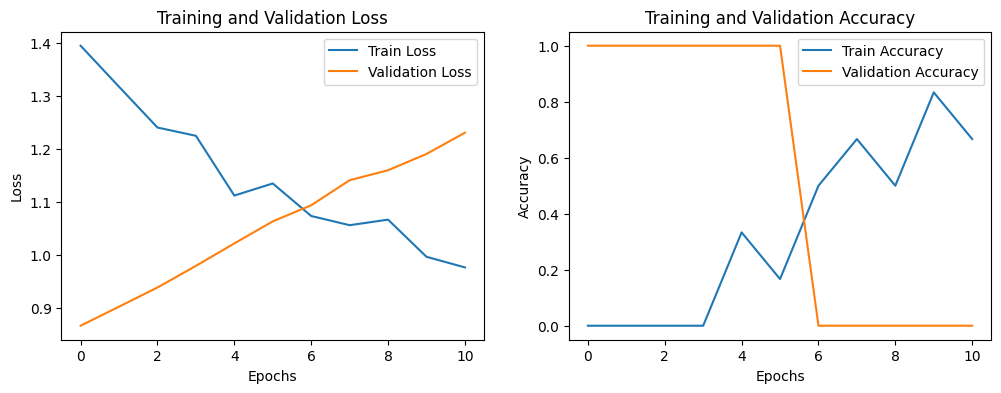

In [ ]:

# @title Выводим графики

import matplotlib.pyplot as plt
# Выводим графики обучения
plt.figure(figsize=(12, 4))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


1/1 [==============================] - 0s 468ms/step


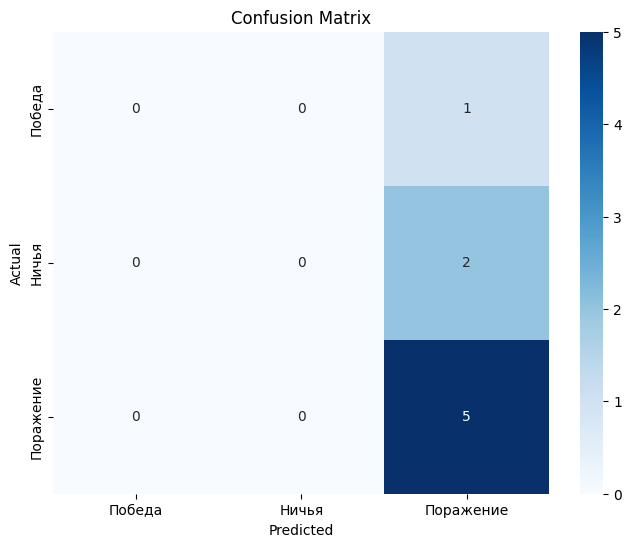

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         2
         2.0       0.62      1.00      0.77         5

    accuracy                           0.62         8
   macro avg       0.21      0.33      0.26         8
weighted avg       0.39      0.62      0.48         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# @title Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Предсказания модели
predictions = model.predict(X_train)

# Получение меток классов (аргмакс для softmax)
predicted_labels = np.argmax(predictions, axis=1)

# Расчет confusion matrix
cm = confusion_matrix(y_train, predicted_labels)

# Визуализация с использованием seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Победа', 'Ничья', 'Поражение'], yticklabels=['Победа', 'Ничья', 'Поражение'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_train, predicted_labels))


In [ ]:
# @title Сохранение модели в файл

model.save('my_model_Dense_+_LSTM_80.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Нейросеть LSTM

In [ ]:
# Подготовка данных
# Преобразование DataFrame в массив NumPy
X_train_array = X_train.to_numpy()

# Изменение формы массива
X_train_array = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)



In [ ]:
X_train_array.shape

(280, 57, 1)

In [ ]:
#@title Структура нейросети LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM

from tensorflow import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split



# model = Sequential()
# model.add(Dense(200, input_shape=( X_train_array.shape[1],  X_train_array.shape[2]), activation='tanh'))
# model.add(Dropout(rate=0.3))
# model.add(Dense(100, activation='relu'))
# model.add(LSTM(200, return_sequences=True))
# model.add(Flatten())
# model.add(Dense(200, activation='relu'))
# model.add(Dropout(rate=0.3))
# model.add(Dense(32, activation='tanh'))
# model.add(Dense(3, activation='softmax'))

# # Компиляция модели
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # Обучение модели
# # Train the model
# history = model.fit(X_train_array, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_train_array, y_train)
# print("Accuracy on the test set:", accuracy)
#--------------------------------------------------------------------------------------------------------


from tensorflow.keras.callbacks import EarlyStopping

# # Создание модели
# model = Sequential()
# model.add(LSTM(60, input_shape=(X_train_array.shape[1], X_train_array.shape[2]), return_sequences=True))
# model.add(Dense(80, activation='relu', kernel_regularizer=l1(0.005)))
# model.add(Dropout(rate=0.2))
# # model.add(Dense(160, activation='softmax'))
# model.add(Flatten())
# model.add(Dense(60, activation='sigmoid'))
# model.add(Dropout(rate=0.2))
# model.add(Dense(32, activation='tanh'))
# model.add(Dense(3, activation='softmax'))
#---------------------------------------------------------------------------------------------------------------

# Создание модели
model = Sequential()
model.add(LSTM(32, input_shape=(X_train_array.shape[1], X_train_array.shape[2]), return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(LSTM(16, return_sequences=True))  # Второй слой LSTM
# model.add(LSTM(8, return_sequences=False))  # Второй слой LSTM
model.add(Flatten())
model.add(Dense(60, activation='sigmoid', kernel_regularizer=l1(0.005)))
model.add(Dropout(rate=0.2))
# model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='softmax'))
#-----------------------------------------------------------------------------------------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# model = Sequential()
# model.add(Conv1D(120, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.3))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dense(60, activation='sigmoid'))
# model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(3, activation='softmax'))

#----------------------------------------------------------------------------------------------------------------
# model = Sequential()
# model.add(Conv1D(160, kernel_size=3, activation='relu', input_shape=(X_train_array.shape[1], X_train_array.shape[2])))
# model.add(Dropout(0.3))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(LSTM(180, return_sequences=False))
# model.add(Dense(3, activation='softmax'))
#-------------------------------------------------------------------------------------------------------------------------------

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ранняя остановка
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели с ранней остановкой
history = model.fit(X_train_array, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Оценка модели
loss, accuracy = model.evaluate(X_train_array, y_train)
print("Accuracy on the test set:", accuracy)


Epoch 1/50
7/7 [==============================] - 3s 113ms/step - loss: 15.0328 - accuracy: 0.4286 - val_loss: 12.9908 - val_accuracy: 0.4643
Epoch 2/50
7/7 [==============================] - 0s 25ms/step - loss: 11.6762 - accuracy: 0.4286 - val_loss: 9.9357 - val_accuracy: 0.4643
Epoch 3/50
7/7 [==============================] - 0s 25ms/step - loss: 8.8230 - accuracy: 0.4420 - val_loss: 7.3749 - val_accuracy: 0.4643
Epoch 4/50
7/7 [==============================] - 0s 25ms/step - loss: 6.4925 - accuracy: 0.3973 - val_loss: 5.2861 - val_accuracy: 0.4643
Epoch 5/50
7/7 [==============================] - 0s 28ms/step - loss: 4.6013 - accuracy: 0.3661 - val_loss: 3.6507 - val_accuracy: 0.4643
Epoch 6/50
7/7 [==============================] - 0s 28ms/step - loss: 3.1582 - accuracy: 0.3884 - val_loss: 2.4731 - val_accuracy: 0.4643
Epoch 7/50
7/7 [==============================] - 0s 27ms/step - loss: 2.1723 - accuracy: 0.3929 - val_loss: 1.7573 - val_accuracy: 0.4643
Epoch 8/50
7/7 [=======

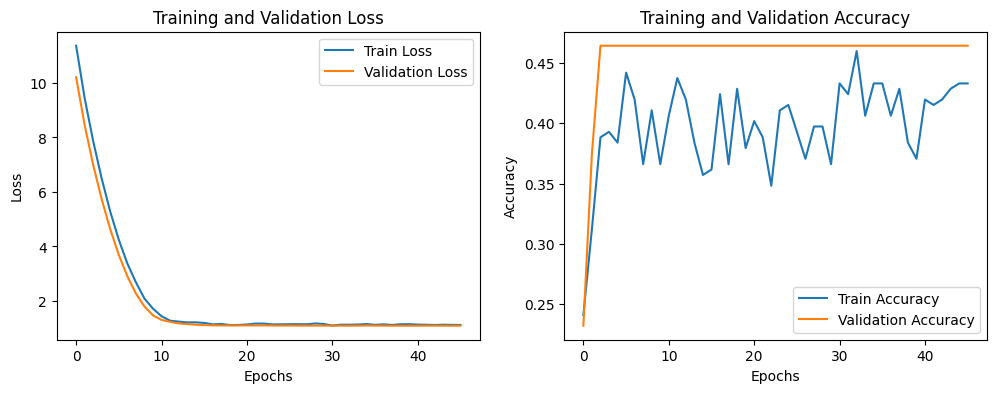

In [ ]:

# @title Выводим графики

import matplotlib.pyplot as plt
# Выводим графики обучения
plt.figure(figsize=(12, 4))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9/9 [==============================] - 1s 10ms/step


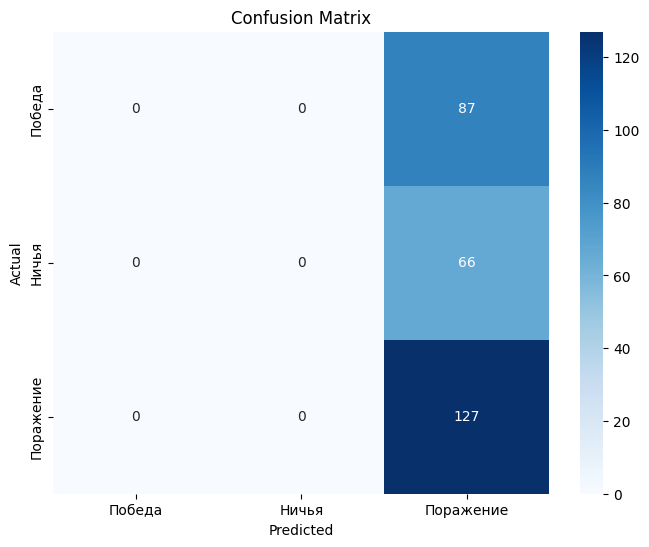

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        87
         1.0       0.00      0.00      0.00        66
         2.0       0.45      1.00      0.62       127

    accuracy                           0.45       280
   macro avg       0.15      0.33      0.21       280
weighted avg       0.21      0.45      0.28       280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# @title Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Предсказания модели
predictions = model.predict(X_train)

# Получение меток классов (аргмакс для softmax)
predicted_labels = np.argmax(predictions, axis=1)

# Расчет confusion matrix
cm = confusion_matrix(y_train, predicted_labels)

# Визуализация с использованием seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Победа', 'Ничья', 'Поражение'], yticklabels=['Победа', 'Ничья', 'Поражение'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_train, predicted_labels))

In [ ]:
# @title Сохранение модели в файл

model.save('my_model_Conv1D_76.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Предсказание

In [ ]:

# загружаем данные
excel_data = pd.read_excel('/content/drive/MyDrive/Диплом Мой AI/Data/hockey_predict.xlsx', sheet_name = 0)
excel_data.head()

,A,B,Data,bet_win,bet_draw,bet_loss,game score A,game score B,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве
0,Авангард,Салават Юлаев,26.10.23,2.425,3.87,2.660,1,0,0,0,0,0,9,0.00,4,7,100.00,0,0,13,7,50.00,0,0,7,0.00,1,9,100.00,1,2,8,7,50.00,0,0,7,0.00,6,8,100.0,2,7,8,8,34.78,0,0,8,0.0,5,7,100.00,2,7,5,15,65.22,0,0
1,Сибирь,Спартак Москва,26.10.23,2.890,4.00,2.270,4,3,1,2,0,0,5,20.00,3,15,88.24,5,31,11,3,18.75,0,0,17,11.76,7,4,80.00,0,0,7,13,81.25,0,0,7,0.00,6,10,100.0,0,0,1,9,50.00,0,0,10,0.0,4,7,100.00,1,2,12,9,50.00,0,0
2,Адмирал,Витязь,26.10.23,1.930,3.81,3.760,3,3,0,1,1,0,9,0.00,1,6,85.71,0,0,3,6,50.00,0,0,7,14.29,8,9,100.00,0,0,6,6,50.00,0,0,15,6.67,4,11,100.0,1,2,10,14,58.33,0,0,11,0.0,5,14,93.33,0,0,5,10,41.67,0,0
3,Амур,ЦСКА,26.10.23,3.485,3.80,2.070,2,2,0,2,1,0,10,0.00,1,5,71.43,1,2,3,9,50.00,0,0,7,28.57,4,10,100.00,1,2,5,9,50.00,1,0,10,10.00,6,9,100.0,0,0,1,9,40.91,0,0,9,0.0,7,9,90.00,3,6,3,13,59.09,0,0
4,Куньлунь Ред Стар,СКА,25.10.23,6.730,5.64,1.384,3,6,3,1,0,3,9,33.33,7,9,90.00,2,4,6,10,55.56,2,0,10,10.00,4,6,66.67,2,4,3,8,44.44,1,0,3,0.00,5,7,70.0,3,6,4,3,20.00,0,0,10,30.0,4,3,100.00,2,4,3,12,80.00,2,0


In [ ]:
excel_data.dtypes

A                                  object
B                                  object
Data                               object
bet_win                           float64
bet_draw                          float64
bet_loss                          float64
game score A                        int64
game score B                        int64
period 1 score A                    int64
period 1 score B                    int64
period 2 score A                    int64
period 2 score B                    int64
А_п.1 Броски в створ                int64
А_п.1 Реализованные броски (%)    float64
А_п.1 Блокировано бросков           int64
А_п.1 Отраженные броски             int64
А_п.1 Отраженные броски (%)       float64
А_п.1 Удаления                      int64
А_п.1 Штрафное время                int64
А_п.1 Силовые приемы                int64
А_п.1 Выигранные вбрасывания        int64
А_п.1 Вбрасывания (%)             float64
А_п.1 Шайбы в большинстве           int64
А_п.1 Шайбы в меньшинстве         

In [ ]:
# Удаление столбцов game score A и game score B, т.к. они результат матча и Data
columns_to_drop = ['game score A', 'game score B', 'Data']
excel_data.drop(columns=columns_to_drop, inplace=True)
# маркируем домашнюю команду 0, гостевую 1
excel_data['A'] = 0.0
excel_data['B'] = 1.0

In [ ]:
# Вывод всей таблицы
pd.set_option('display.max_columns', None)
display(excel_data)

,A,B,bet_win,bet_draw,bet_loss,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве
0,0.0,1.0,2.425,3.87,2.660,0,0,0,0,9,0.00,4,7,100.00,0,0,13,7,50.00,0,0,7,0.00,1,9,100.00,1,2,8,7,50.00,0,0,7,0.00,6,8,100.00,2,7,8,8,34.78,0,0,8,0.00,5,7,100.00,2,7,5,15,65.22,0,0
1,0.0,1.0,2.890,4.00,2.270,1,2,0,0,5,20.00,3,15,88.24,5,31,11,3,18.75,0,0,17,11.76,7,4,80.00,0,0,7,13,81.25,0,0,7,0.00,6,10,100.00,0,0,1,9,50.00,0,0,10,0.00,4,7,100.00,1,2,12,9,50.00,0,0
2,0.0,1.0,1.930,3.81,3.760,0,1,1,0,9,0.00,1,6,85.71,0,0,3,6,50.00,0,0,7,14.29,8,9,100.00,0,0,6,6,50.00,0,0,15,6.67,4,11,100.00,1,2,10,14,58.33,0,0,11,0.00,5,14,93.33,0,0,5,10,41.67,0,0
3,0.0,1.0,3.485,3.80,2.070,0,2,1,0,10,0.00,1,5,71.43,1,2,3,9,50.00,0,0,7,28.57,4,10,100.00,1,2,5,9,50.00,1,0,10,10.00,6,9,100.00,0,0,1,9,40.91,0,0,9,0.00,7,9,90.00,3,6,3,13,59.09,0,0
4,0.0,1.0,6.730,5.64,1.384,3,1,0,3,9,33.33,7,9,90.00,2,4,6,10,55.56,2,0,10,10.00,4,6,66.67,2,4,3,8,44.44,1,0,3,0.00,5,7,70.00,3,6,4,3,20.00,0,0,10,30.00,4,3,100.00,2,4,3,12,80.00,2,0
5,0.0,1.0,1.935,4.11,3.490,1,3,2,0,6,16.67,6,6,66.67,0,0,1,10,55.56,0,0,9,33.33,7,5,83.33,0,0,6,8,44.44,0,0,18,11.11,4,5,100.00,1,2,1,14,58.33,1,0,5,0.00,3,16,88.89,3,6,4,10,41.67,0,0
6,0.0,1.0,1.915,3.88,3.730,0,1,0,3,13,0.00,8,10,90.91,1,2,4,13,61.90,0,0,11,9.09,2,13,100.00,1,2,3,8,38.10,0,0,11,0.00,3,3,50.00,1,2,2,12,57.14,0,0,6,50.00,5,11,100.00,3,6,6,9,42.86,0,0
7,0.0,1.0,2.035,3.89,3.344,1,0,0,0,5,20.00,5,15,100.00,1,2,8,6,33.33,0,0,15,0.00,2,4,80.00,1,2,2,12,66.67,0,0,9,0.00,9,8,100.00,0,0,3,7,70.00,0,0,8,0.00,3,9,100.00,1,2,2,3,30.00,0,0
8,0.0,1.0,2.275,3.86,2.870,0,1,0,0,12,0.00,2,11,91.67,0,0,3,9,69.23,0,0,12,8.33,3,12,100.00,0,0,7,4,30.77,0,0,10,0.00,0,5,100.00,0,0,6,10,50.00,0,0,5,0.00,10,10,100.00,0,0,4,10,50.00,0,0
9,0.0,1.0,1.840,3.97,3.970,2,0,1,1,11,18.18,6,5,100.00,0,0,2,11,61.11,0,0,5,0.00,6,9,81.82,1,2,6,7,38.89,0,0,15,6.67,8,7,87.50,5,21,3,10,50.00,0,0,8,12.50,4,14,93.33,2,7,10,10,50.00,0,0


In [ ]:
excel_data = excel_data.astype(float)

In [ ]:
excel_data.dtypes


A                                 float64
B                                 float64
bet_win                           float64
bet_draw                          float64
bet_loss                          float64
period 1 score A                  float64
period 1 score B                  float64
period 2 score A                  float64
period 2 score B                  float64
А_п.1 Броски в створ              float64
А_п.1 Реализованные броски (%)    float64
А_п.1 Блокировано бросков         float64
А_п.1 Отраженные броски           float64
А_п.1 Отраженные броски (%)       float64
А_п.1 Удаления                    float64
А_п.1 Штрафное время              float64
А_п.1 Силовые приемы              float64
А_п.1 Выигранные вбрасывания      float64
А_п.1 Вбрасывания (%)             float64
А_п.1 Шайбы в большинстве         float64
А_п.1 Шайбы в меньшинстве         float64
B_п.1 Броски в створ              float64
B_п.1 Реализованные броски (%)    float64
B_п.1 Блокировано бросков         

In [ ]:
print(excel_data[columns_to_normalize].std())


B_п.1 Блокировано бросков          2.269695
B_п.1 Броски в створ               3.872005
B_п.1 Вбрасывания (%)             15.660410
B_п.1 Выигранные вбрасывания       2.593699
B_п.1 Отраженные броски            3.060006
B_п.1 Отраженные броски (%)       11.847698
B_п.1 Реализованные броски (%)    11.695665
B_п.1 Силовые приемы               2.393172
B_п.1 Удаления                     0.651339
B_п.1 Шайбы в большинстве          0.389249
B_п.1 Шайбы в меньшинстве          0.000000
B_п.1 Штрафное время               1.302678
B_п.2 Блокировано бросков          2.276361
B_п.2 Броски в створ               3.433348
B_п.2 Вбрасывания (%)             12.938962
B_п.2 Выигранные вбрасывания       2.979729
B_п.2 Отраженные броски            3.663911
B_п.2 Отраженные броски (%)        5.089812
B_п.2 Реализованные броски (%)    15.702895
B_п.2 Силовые приемы               2.979729
B_п.2 Удаления                     1.073087
B_п.2 Шайбы в большинстве          0.651339
B_п.2 Шайбы в меньшинстве       

In [ ]:
# Нормализация данных
df_normalized = pd.DataFrame(excel_data)
# Исключаем столбец 'Win' из нормализации
columns_to_normalize = df_normalized.columns.difference(['Win', 'A', 'B'])

# Создаем экземпляр MinMaxScaler
scaler = MinMaxScaler()

# Нормализуем выбранные столбцы
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])


In [ ]:
# Вывод всей таблицы
pd.set_option('display.max_columns', None)
display(df_normalized)

,A,B,bet_win,bet_draw,bet_loss,period 1 score A,period 1 score B,period 2 score A,period 2 score B,А_п.1 Броски в створ,А_п.1 Реализованные броски (%),А_п.1 Блокировано бросков,А_п.1 Отраженные броски,А_п.1 Отраженные броски (%),А_п.1 Удаления,А_п.1 Штрафное время,А_п.1 Силовые приемы,А_п.1 Выигранные вбрасывания,А_п.1 Вбрасывания (%),А_п.1 Шайбы в большинстве,А_п.1 Шайбы в меньшинстве,B_п.1 Броски в створ,B_п.1 Реализованные броски (%),B_п.1 Блокировано бросков,B_п.1 Отраженные броски,B_п.1 Отраженные броски (%),B_п.1 Удаления,B_п.1 Штрафное время,B_п.1 Силовые приемы,B_п.1 Выигранные вбрасывания,B_п.1 Вбрасывания (%),B_п.1 Шайбы в большинстве,B_п.1 Шайбы в меньшинстве,А_п.2 Броски в створ,А_п.2 Реализованные броски (%),А_п.2 Блокировано бросков,А_п.2 Отраженные броски,А_п.2 Отраженные броски (%),А_п.2 Удаления,А_п.2 Штрафное время,А_п.2 Силовые приемы,А_п.2 Выигранные вбрасывания,А_п.2 Вбрасывания (%),А_п.2 Шайбы в большинстве,А_п.2 Шайбы в меньшинстве,B_п.2 Броски в створ,B_п.2 Реализованные броски (%),B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве
0,0.0,1.0,0.119632,0.038043,0.493426,0.000000,0.000000,0.0,0.000000,0.500,0.000000,0.428571,0.333333,1.000000,0.0,0.000000,1.000000,0.363636,0.568906,0.0,0.0,0.230769,0.000000,0.000000,0.555556,1.000000,0.5,0.5,0.750,0.333333,0.431094,0.0,0.0,0.266667,0.0000,0.666667,0.384615,1.0000,0.4,0.333333,0.777778,0.454545,0.2956,0.0,0.0,0.250000,0.0000,0.444444,0.307692,1.0000,0.666667,1.000000,0.3,1.000000,0.7044,0.0,0.0
1,0.0,1.0,0.214724,0.108696,0.342614,0.333333,0.666667,0.0,0.000000,0.000,0.600060,0.285714,1.000000,0.647165,1.0,1.000000,0.833333,0.000000,0.000000,0.0,0.0,1.000000,0.352835,0.857143,0.000000,0.399940,0.0,0.0,0.625,1.000000,1.000000,0.0,0.0,0.266667,0.0000,0.666667,0.538462,1.0000,0.0,0.000000,0.000000,0.545455,0.6000,0.0,0.0,0.416667,0.0000,0.333333,0.307692,1.0000,0.333333,0.285714,1.0,0.500000,0.4000,0.0,0.0
2,0.0,1.0,0.018405,0.005435,0.918794,0.000000,0.333333,0.5,0.000000,0.500,0.000000,0.000000,0.250000,0.571257,0.0,0.000000,0.166667,0.272727,0.568906,0.0,0.0,0.230769,0.428743,1.000000,0.555556,1.000000,0.0,0.0,0.500,0.222222,0.431094,0.0,0.0,0.800000,0.5336,0.444444,0.615385,1.0000,0.2,0.095238,1.000000,1.000000,0.7666,0.0,0.0,0.500000,0.0000,0.444444,0.846154,0.4664,0.000000,0.000000,0.3,0.583333,0.2334,0.0,0.0
3,0.0,1.0,0.336401,0.000000,0.265275,0.000000,0.666667,0.5,0.000000,0.625,0.000000,0.000000,0.166667,0.142814,0.2,0.064516,0.166667,0.545455,0.568906,0.0,0.0,0.230769,0.857186,0.428571,0.666667,1.000000,0.5,0.5,0.375,0.555556,0.431094,1.0,0.0,0.466667,0.8000,0.666667,0.461538,1.0000,0.0,0.000000,0.000000,0.545455,0.4182,0.0,0.0,0.333333,0.0000,0.666667,0.461538,0.2000,1.000000,0.857143,0.1,0.833333,0.5818,0.0,0.0
4,0.0,1.0,1.000000,1.000000,0.000000,1.000000,0.333333,0.0,1.000000,0.500,1.000000,0.857143,0.500000,0.699970,0.4,0.129032,0.416667,0.636364,0.670126,1.0,0.0,0.461538,0.300030,0.428571,0.222222,0.000000,1.0,1.0,0.125,0.444444,0.329874,1.0,0.0,0.000000,0.0000,0.555556,0.307692,0.4000,0.6,0.285714,0.333333,0.000000,0.0000,0.0,0.0,0.416667,0.6000,0.333333,0.000000,1.0000,0.666667,0.571429,0.1,0.750000,1.0000,1.0,0.0
5,0.0,1.0,0.019427,0.168478,0.814385,0.333333,1.000000,1.0,0.000000,0.125,0.500150,0.714286,0.250000,0.000000,0.0,0.000000,0.000000,0.636364,0.670126,0.0,0.0,0.384615,1.000000,0.857143,0.111111,0.499850,0.0,0.0,0.500,0.444444,0.329874,0.0,0.0,1.000000,0.8888,0.444444,0.153846,1.0000,0.2,0.095238,0.000000,1.000000,0.7666,1.0,0.0,0.000000,0.0000,0.222222,1.000000,0.1112,1.000000,0.857143,0.2,0.583333,0.2334,0.0,0.0
6,0.0,1.0,0.015337,0.043478,0.907193,0.000000,0.333333,0.0,1.000000,1.000,0.000000,1.000000,0.583333,0.727273,0.2,0.064516,0.250000,0.909091,0.785545,0.0,0.0,0.538462,0.272727,0.142857,1.000000,1.000000,0.5,0.5,0.125,0.444444,0.214455,0.0,

In [ ]:
# @title Загрузка модели
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Диплом Мой AI/Data/Новый сайт, данные/my_model_Dense_84.h5')


In [ ]:
# @title Получение предсказания

# Предположим, что у вас есть данные test_data
predictions = model.predict(df_normalized)
print(predictions)


1/1 [==============================] - 0s 96ms/step
[[9.3008649e-01 3.3161230e-02 3.6752120e-02]
 [1.1384581e-02 1.7694978e-03 9.8684597e-01]
 [9.2922533e-01 4.4805374e-02 2.5969207e-02]
 [4.2066826e-03 1.7468603e-02 9.7832465e-01]
 [8.9251959e-01 3.6211815e-02 7.1268566e-02]
 [1.6617379e-03 3.5100139e-03 9.9482834e-01]
 [9.9702412e-01 1.7032614e-03 1.2725168e-03]
 [1.7309623e-02 5.3259730e-03 9.7736436e-01]
 [4.4111870e-02 5.2010961e-02 9.0387726e-01]
 [2.2185484e-05 9.4839506e-04 9.9902940e-01]]


In [ ]:
import tensorflow as tf

# Загрузка модели
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Диплом Мой AI/Data/Новый сайт, данные/my_model_Dense_84.h5')

# Вывод архитектуры модели
print(loaded_model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               11600     
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 70)                14070     
                                                                 
 dense_17 (Dense)            (None, 3)                 213       
                                                                 
Total params: 25883 (101.11 KB)
Trainable params: 25883 (101.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
